# Leveraging NLP in customer sentiment analysis for product improvement in women's clothing E-commerce 

## Business Problem 
#### This is an e-commerce clothing retailer strictly dealing in women's wear. The business has built a large dataset of customer reviews, including ratings for individual products and, text from the review, the age of each customer, among other feedback metrics. The question is how the business lacks this understanding and the factors behind product recommendations that will serve to provide better customer satisfaction by increasing sales and reducing returns. Customer reviews contain quite a lot of firsthand information about experiences and perceptions. On the negative side, the amount of textual data does make the analysis unwieldy. So the business wants to analyze the reviews to get some actionable insights.

## Data Collection
#### Relevant data has already been collected through company's website and google reviews in the form of the dataset provided. For further analysis, customer reviews should still be collected by the company and stored, wherein data anonymization and secure storage will protect customer data. 

## NLP Task
#### To address the business problem, I am going to formulate the NLP task as a Sentiment Analysis pipeline. The objective of this pipeline is to determine the sentiment of each review, for which I will use various models suitable for Sentiment analysis and select the best model with highest accuracy. 

#### The Link of dataset is [here](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/data)

In [47]:
import pandas as pa
import numpy as nu
import matplotlib.pyplot as mlt
import seaborn as sbn
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Uploading and exmaining dataset

In [48]:
wd = pa.read_csv("Women Dataset.csv")

In [49]:
wd.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Data Exploration

## Examining the dataset

In [50]:
wd.shape

(23486, 11)

## Examining Null Values

In [51]:
wd.isnull().sum().sum()

4697

## Examining Duplicate Value

In [52]:
wd.duplicated().sum()

0

# Preprocess of data

## Eliminating Null Value

In [53]:
wd = wd.dropna()

## Rechecking Null Value

In [54]:
wd.isnull().sum().sum()

0

In [55]:
wd['Review Text'] = wd['Review Text'].str.lower()

#### Here i convert Required columns to Lowercase because easier for processing

In [56]:
wd['Review Text'] = wd['Review Text'].str.replace(r'[^a-zA-Z\s]', '')

#### Here i removed punctuation and special characters becausse this step is useful for text analysis

In [57]:
wd['tokenized_text'] = wd['Review Text'].apply(word_tokenize)

#### To break the sentences to words for text analysis

In [58]:
def map_sentiment(star):
    if star in [1, 2]:
        return 'Negative'
    elif star == 3:
        return 'Neutral'
    elif star in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  
wd['Rating'] = wd.Rating.apply(map_sentiment)

#### In this code i make 3 catagories positive, negative and neutal. It helps to understand further use for sentiments for data analysis.

In [59]:
wd.rename(columns={"Rating":"label"},inplace=True)
wd.rename(columns={"Review":"text"},inplace=True)

#### Here columns name has been renamed because this step is useful for understandable or improve clarity when working with dataset

In [60]:
wd["label"].value_counts()

label
Positive    15147
Neutral      2464
Negative     2051
Name: count, dtype: int64

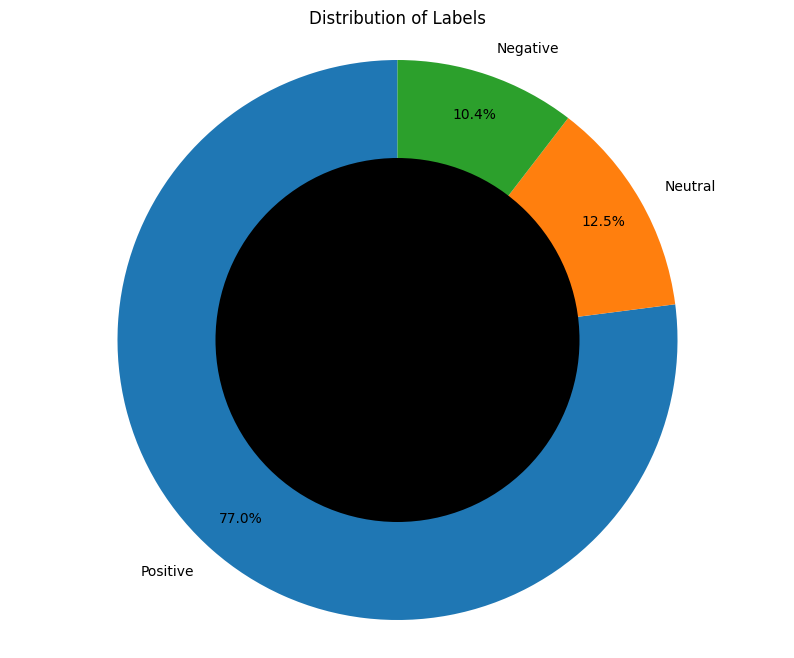

In [61]:
lbl_cnt = wd["label"].value_counts()

mlt.figure(figsize=(10,8))
mlt.pie(lbl_cnt, labels=lbl_cnt.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
mlt.title('Distribution of Labels')
mlt.gca().add_artist(mlt.Circle((0,0),0.65,fc='black'))
mlt.axis('equal')
mlt.show()

#### In distribution labels we can see that how much women has reviewed as positive, negative and neutral. The most review is positive around 77.0%. which is good for the products.

# Sentiment Analysis

## Positive sentiment words

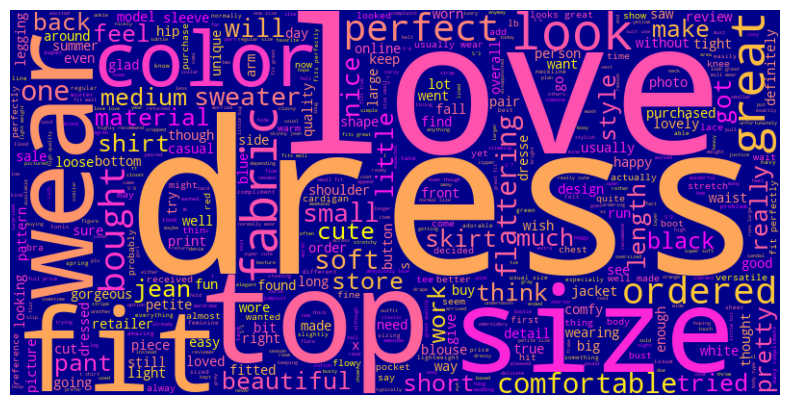

In [62]:
pst_wcd = wd[wd["label"] == "Positive"]
pst_rvw_txt	 = " ".join(pst_wcd['Review Text'].values.tolist())
wcd = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='darkblue', colormap="spring", max_words=800)
wcd.generate(pst_rvw_txt)

mlt.figure(figsize=(10, 5))
mlt.imshow(wcd, interpolation='bilinear')
mlt.axis('off')
mlt.show()

#### By using workcloud visualization method i got positive review text. In the output we can see that most positive words can be seen by this wordcloud

## Negative sentiment words

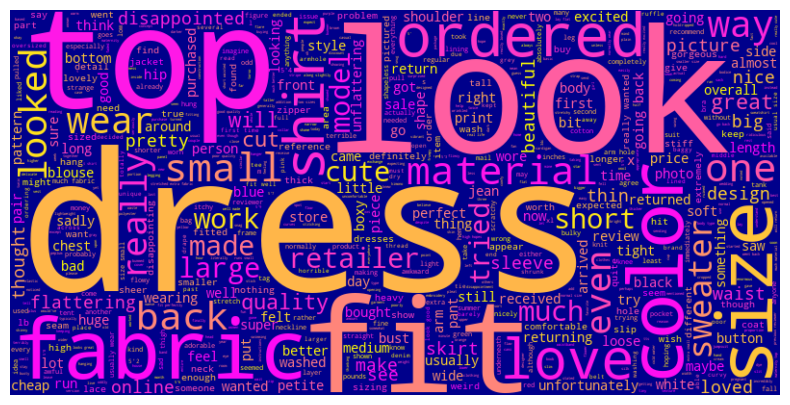

In [63]:
ngt_wcd = wd[wd["label"] == "Negative"]
ngt_rvw_txt= " ".join(ngt_wcd['Review Text'].values.tolist())
wcd = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='darkblue', colormap="spring", max_words=800)
wcd.generate(ngt_rvw_txt)

mlt.figure(figsize=(10, 5))
mlt.imshow(wcd, interpolation='bilinear')
mlt.axis('off')
mlt.show()

#### Here workcloud visualization method, I got Negative review text and the most commonly uesed words for text lebels as negative and this will helps to understand which words appears the most frequetly in negative reviews.

## Neutral sentiment words

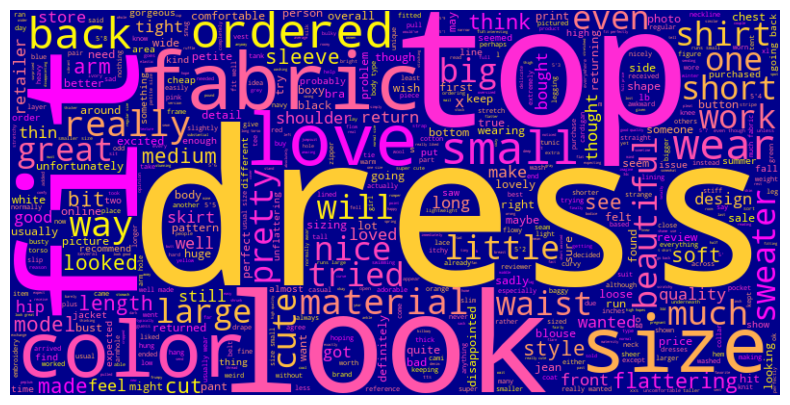

In [64]:
ntl_wcd = wd[wd["label"] == "Neutral"]
ntl_rvw_txt = " ".join(ntl_wcd['Review Text'].values.tolist())
wcd = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='darkblue', colormap="spring", max_words=800)
wcd.generate(ntl_rvw_txt)

mlt.figure(figsize=(10, 5))
mlt.imshow(wcd, interpolation='bilinear')
mlt.axis('off')
mlt.show()

#### Here in the neutral reviewd, it collect all neutral text entries into one string, make a word cloud, and then displays it. The cloude will shows the most frequent words.

In [65]:
v = wd['Review Text']
c = wd['Recommended IND']
v_trn, v_tst, c_trn, c_tst = train_test_split(v, c, test_size=0.2, random_state=42)

#### Here I divided the data into train set and test set as i will train models on train data and after training will test model on test data to find accuracy of model.

In [66]:
tfd_vtr = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
v_trn_tfd = tfd_vtr.fit_transform(v_trn)
v_tst_tfd = tfidf_vectorizer.transform(v_tst)

#### In this i transform data which is in text form into numeric feture using vectorization because to understand and analyze the text 

# Model Training

## Logistic Regression

In [67]:
lgr_model = LogisticRegression(random_state=42)

lgr_model.fit(v_trn_tfd, c_trn)

LogisticRegression(random_state=42)

Accuracy of logistic regression: 0.8988049834731757
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       700
           1       0.91      0.97      0.94      3233

    accuracy                           0.90      3933
   macro avg       0.86      0.77      0.80      3933
weighted avg       0.89      0.90      0.89      3933



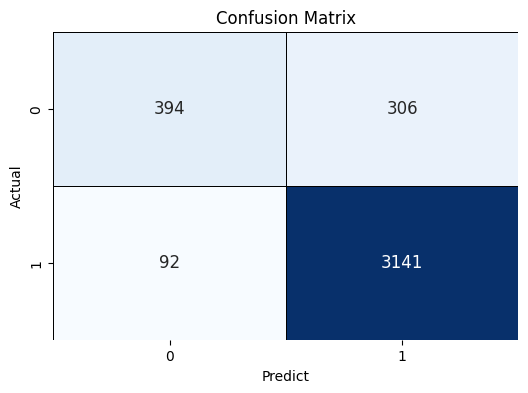

In [68]:
c_prd_lgr = lgr_model.predict(v_tst_tfd)

acc_lgr = accuracy_score(c_tst, c_prd_lgr)
print("Accuracy of logistic regression:", acc_lgr)
print(classification_report(c_tst, c_prd_lgr))

def plt_cnf(c_true, c_prd):
    cm = confusion_matrix(c_true, c_prd)
    mlt.figure(figsize=(6, 4))
    sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'fontsize': 12}, linewidths=0.5, linecolor='black')
    mlt.xlabel('Predict')
    mlt.ylabel('Actual')
    mlt.title('Confusion Matrix')
    mlt.show()

plt_cnf(c_tst, c_prd_lgr)

## Random Forest Model

In [69]:
rnd_fst_model = RandomForestClassifier(random_state=42)

rnd_fst_model.fit(v_trn_tfd, c_trn)

RandomForestClassifier(random_state=42)

Accuracy of Random Forest: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.82      0.34      0.48       700
           1       0.87      0.98      0.93      3233

    accuracy                           0.87      3933
   macro avg       0.85      0.66      0.70      3933
weighted avg       0.86      0.87      0.85      3933



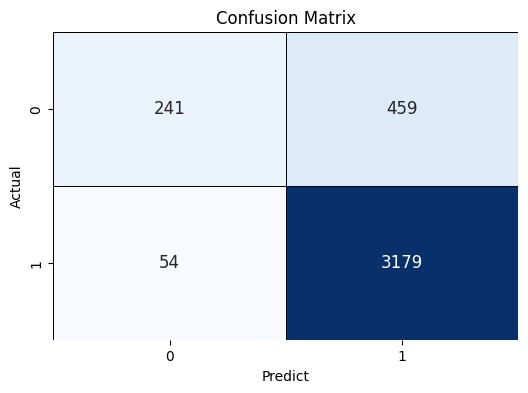

In [70]:
c_prd_rnd = rnd_fst_model.predict(v_tst_tfd)

acc_rnd = accuracy_score(c_tst, c_prd_rnd)
print("Accuracy of Random Forest:", acc_rnd)
print(classification_report(c_tst, c_prd_rnd))

plt_cnf(c_tst, c_prd_rnd)

## Multinomial Naive Bayes Model

In [71]:
mnl_model = MultinomialNB()

mnl_model.fit(v_trn_tfd, c_trn)

MultinomialNB()

Accuracy of Multinomial Naive Bayes: 0.8876175947114162
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       700
           1       0.90      0.97      0.93      3233

    accuracy                           0.89      3933
   macro avg       0.84      0.74      0.77      3933
weighted avg       0.88      0.89      0.88      3933



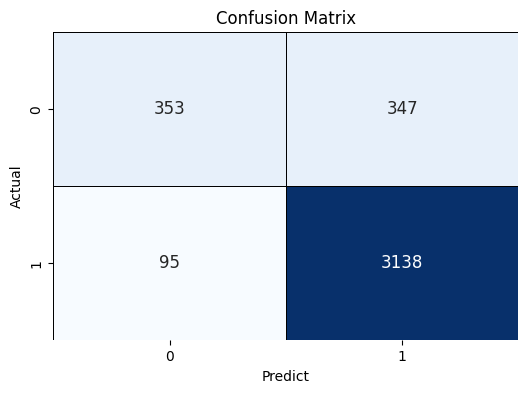

In [72]:
c_prd_mnl = mnl_model.predict(v_tst_tfd)

acc_mnl = accuracy_score(c_tst, c_prd_mnl)
print("Accuracy of Multinomial Naive Bayes:", acc_mnl)
print(classification_report(c_tst, c_prd_mnl))

plt_cnf(c_tst, c_prd_mnl)

## Support Vector Model

In [73]:
sm_mdl = SVC(kernel='linear', random_state=42)

sm_mdl.fit(v_trn_tfd, c_trn)

SVC(kernel='linear', random_state=42)

SVM Accuracy: 0.9094838545639461
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       700
           1       0.93      0.96      0.95      3233

    accuracy                           0.91      3933
   macro avg       0.86      0.82      0.84      3933
weighted avg       0.91      0.91      0.91      3933



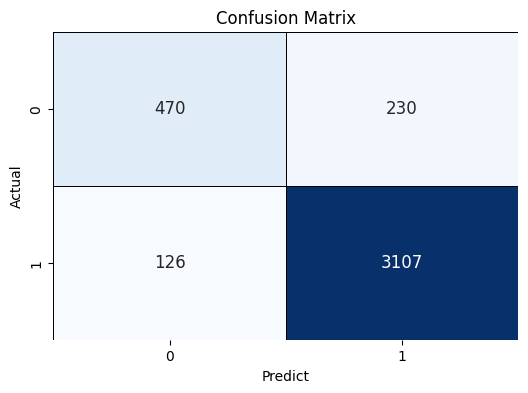

In [74]:
c_prd_sm = sm_mdl.predict(v_tst_tfd)

acc_sm = accuracy_score(c_tst, c_prd_sm)
print("SVM Accuracy:", acc_sm)
print(classification_report(c_tst, c_prd_sm))

plt_cnf(c_tst, c_prd_sm)

## Gradient Boosting Model

In [75]:
grd_mdl = GradientBoostingClassifier(random_state=42)

grd_mdl.fit(v_trn_tfd, c_trn)

GradientBoostingClassifier(random_state=42)

Accuracy of Gradient Boosting: 0.8680396643783371
              precision    recall  f1-score   support

           0       0.78      0.36      0.49       700
           1       0.88      0.98      0.92      3233

    accuracy                           0.87      3933
   macro avg       0.83      0.67      0.71      3933
weighted avg       0.86      0.87      0.85      3933



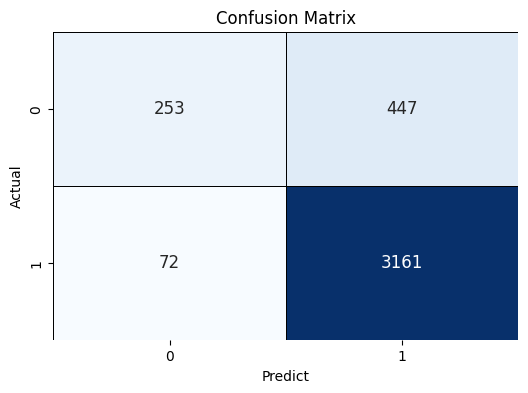

In [76]:
c_prd_grd = grd_mdl.predict(v_tst_tfd)

acc_grd = accuracy_score(c_tst, c_prd_grd)
print("Accuracy of Gradient Boosting:", acc_grd)
print(classification_report(c_tst, c_prd_grd))

plt_cnf(c_tst, c_prd_grd)

## PassiveAggressiveClassifier Model

In [77]:
pa_wd = PassiveAggressiveClassifier(random_state=42)

pa_wd.fit(v_trn_tfd, c_trn)

PassiveAggressiveClassifier(random_state=42)

Passive Aggressive Accuracy: 0.8642257818459191
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       700
           1       0.93      0.91      0.92      3233

    accuracy                           0.86      3933
   macro avg       0.77      0.79      0.78      3933
weighted avg       0.87      0.86      0.87      3933



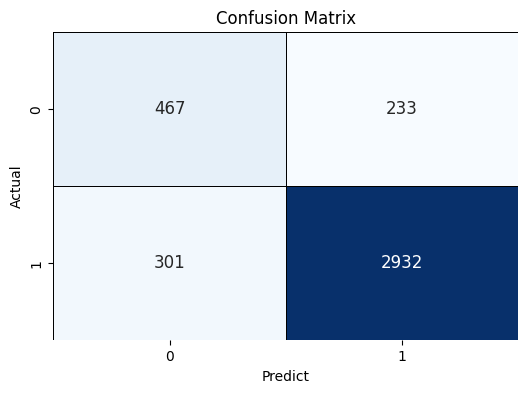

In [78]:
c_prd_pa = pa_wd.predict(v_tst_tfd)

acc_pa = accuracy_score(c_tst, c_prd_pa)
print("Passive Aggressive Accuracy:", acc_pa)
print(classification_report(c_tst, c_prd_pa))

plt_cnf(c_tst, c_prd_pa)

## Choosing the best model

In [79]:
bst_mdl = max([
    ('Logistic Regression', acc_lgr),
    ('Random Forest', acc_rnd),
    ('Multinomial Naive Bayes', acc_mnl),
    ('Support Vector', acc_sm),
    ('Gradient Boosting', acc_grd),
    ('Passive Aggressive', acc_pa)
], key=lambda x: x[1])

print(f"Best Model: {bst_mdl[0]} has Accuracy: {bst_mdl[1]:.4f}")

Best Model: Support Vector has Accuracy: 0.9095


#### Here we can see that the best model is Support Vector with accuracy of approximately 0.9

## Cross Validation 

In [80]:
sm_mdl = SVC(kernel='linear', random_state=42)
crvn_scr = cross_val_score(sm_mdl, v_trn_tfd, c_trn, cv=5, scoring='accuracy')
print("Cross validatoin scores:", crvn_scr)
print("Mean cross validatoin score:", crvn_scr.mean())
sm_mdl.fit(v_trn_tfd, c_trn)
c_prd_sm = sm_mdl.predict(v_tst_tfd)

print("SVM Accuracy:", accuracy_score(c_tst, c_prd_sm))
print(classification_report(c_tst, c_prd_sm))

Cross validatoin scores: [0.89732994 0.89732994 0.89319771 0.88938334 0.89062003]
Mean cross validatoin score: 0.8935721945347612
SVM Accuracy: 0.9094838545639461
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       700
           1       0.93      0.96      0.95      3233

    accuracy                           0.91      3933
   macro avg       0.86      0.82      0.84      3933
weighted avg       0.91      0.91      0.91      3933



#### Here i did cross validate the SVM model and find out the accuracy is 0.90 which is the highest

# Conclusion

### By Applying to the problem through NLP and Data Analysis task. The Company can get the important data from customer reviews. So it helps to the performance of company and improve the customer satisfaction, sales will increase and product performance.